<a href="https://colab.research.google.com/github/armandordorica/ML_challenge/blob/main/Weather_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [149]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

### **Loading the global weather data**
* Note that all files cover same time period but include data regarding different stations.

In [129]:
### Importing the files that will be needed throughout the analysis
file0 = pd.read_csv("file0.csv")
file1 = pd.read_csv("file1.csv")
file2 = pd.read_csv("file2.csv")
file3 = pd.read_csv("file3.csv")
file4 = pd.read_csv("file4.csv")

station_list = pd.read_csv("stationlist.csv")

country_list = pd.read_csv("countrylist.csv")


In [126]:
file0.describe()

,STN---,WBAN,YEARMODA,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,SNDP,FRSHTT
count,897202.000000,897202.000000,8.972020e+05,897202.000000,897202.000000,897202.000000,897202.000000,897202.000000,897202.000000,897202.000000,897202.000000,897202.000000,897202.000000
mean,443569.352877,84771.272657,2.019067e+07,44.394601,61.835348,1188.000565,1161.129125,166.833660,19.511452,25.906418,660.587137,831.831539,12036.553005
std,288924.007580,31503.854335,4.215023e+02,23.314627,514.836419,1236.033190,1263.706304,358.767511,111.446660,115.463615,464.927302,371.383614,28902.469368
min,10010.000000,106.000000,2.019010e+07,-75.100000,-90.800000,951.900000,667.000000,0.000000,0.000000,0.200000,9.700000,0.400000,0.000000
25%,144470.000000,99999.000000,2.019040e+07,31.800000,23.700000,1009.300000,971.200000,8.900000,3.900000,7.800000,27.000000,999.900000,0.000000
50%,476840.000000,99999.000000,2.019070e+07,46.900000,37.500000,1015.000000,992.700000,10.800000,5.900000,11.100000,999.900000,999.900000,0.000000
75%,722225.000000,99999.000000,2.019100e+07,61.200000,51.000000,1021.100000,1007.000000,23.100000,8.800000,15.500000,999.900000,999.900000,10000.000000
max,949100.000000,99999.000000,2.020010e+07,108.500000,9999.900000,9999.900000,9999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,111110.000000


In [127]:
file1.describe()

,STN---,WBAN,YEARMODA,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,SNDP,FRSHTT
count,894455.000000,894455.000000,8.944550e+05,894455.000000,894455.000000,894455.000000,894455.000000,894455.000000,894455.000000,894455.000000,894455.000000,894455.000000,894455.000000
mean,502797.243613,83016.111348,2.019067e+07,52.682221,85.456160,2358.867467,1481.801120,245.407578,28.326276,36.429975,704.666007,922.233344,8488.305424
std,277101.742684,32931.424747,4.248585e+02,22.695488,665.093893,3204.211792,2090.030755,420.519439,146.971078,155.614568,448.970681,266.368852,24660.741207
min,10060.000000,102.000000,2.019010e+07,-67.900000,-81.200000,926.300000,562.000000,0.000000,0.000000,0.200000,9.700000,0.400000,0.000000
25%,260450.000000,94073.000000,2.019040e+07,39.100000,29.000000,1011.100000,956.900000,8.400000,3.400000,7.000000,28.200000,999.900000,0.000000
50%,577930.000000,99999.000000,2.019070e+07,55.000000,43.100000,1016.800000,994.100000,10.000000,5.200000,9.900000,999.900000,999.900000,0.000000
75%,723119.000000,99999.000000,2.019100e+07,69.900000,56.500000,1025.300000,1010.300000,31.100000,8.000000,15.000000,999.900000,999.900000,10000.000000
max,999999.000000,99999.000000,2.020010e+07,109.900000,9999.900000,9999.900000,9999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,111110.000000


In [131]:
all_files = pd.concat([file0, file1, file2, file3, file4])

### Inspecting the dataframes from imported data

In [150]:
station_list.head()


,STN_NO,COUNTRY_ABBR
0,012240,NO
1,020690,SW
2,020870,SW
3,021190,SW
4,032690,UK


In [151]:
country_list.head()

,COUNTRY_ABBR,COUNTRY_FULL,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,AA,ARUBA,NaN,NaN,NaN
1,AC,ANTIGUA AND BARBUDA,NaN,NaN,NaN
2,AF,AFGHANISTAN,NaN,NaN,NaN
3,AG,ALGERIA,NaN,NaN,NaN
4,AI,ASCENSION ISLAND,NaN,NaN,NaN


### **Joining `station_list` to `country_list` to get the full country name for each station number.**

In [134]:
merged_df = pd.merge(station_list, country_list, how='left', left_on='COUNTRY_ABBR', right_on='COUNTRY_ABBR')
merged_df.head()

,STN_NO,COUNTRY_ABBR,COUNTRY_FULL,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,012240,NO,NORWAY,NaN,NaN,NaN
1,020690,SW,SWEDEN,NaN,NaN,NaN
2,020870,SW,SWEDEN,NaN,NaN,NaN
3,021190,SW,SWEDEN,NaN,NaN,NaN
4,032690,UK,UNITED KINGDOM,NaN,NaN,NaN


In [135]:
country_name = 'SWEDEN'
sweden_df = merged_df[merged_df['COUNTRY_FULL']==country_name ]
sweden_df

,STN_NO,COUNTRY_ABBR,COUNTRY_FULL,Unnamed: 2,Unnamed: 3,Unnamed: 4
1,020690,SW,SWEDEN,NaN,NaN,NaN
2,020870,SW,SWEDEN,NaN,NaN,NaN
3,021190,SW,SWEDEN,NaN,NaN,NaN
109,022900,SW,SWEDEN,NaN,NaN,NaN
110,023000,SW,SWEDEN,NaN,NaN,NaN
...,...,...,...,...,...,...
25070,021450,SW,SWEDEN,NaN,NaN,NaN
25071,021520,SW,SWEDEN,NaN,NaN,NaN
25072,025080,SW,SWEDEN,NaN,NaN,NaN
25194,021020,SW,SWEDEN,NaN,NaN,NaN


### verifying no duplicates

In [137]:
len(sweden_df['STN_NO'].unique()), len(sweden_df['STN_NO'])

(498, 498)

In [121]:
min(file1['YEARMODA']), max(file1['YEARMODA'])

(20190101, 20200101)

### **Inspecting data to understand structure of one station per country**

In [152]:
## Casting to int to make join possible
sweden_df['STN_NO'] = sweden_df['STN_NO'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [231]:
## Joining the station and country name file to the weather data
sweden_all_files = pd.merge(sweden_df, all_files, how='left', left_on='STN_NO', right_on='STN---') 
sweden_all_files_stn_21190 = sweden_file0[sweden_file0['STN_NO']==21190]

In [232]:
def float_to_datetime(x): 
  oldformat=x
  datetimeobject = datetime.strptime(oldformat,'%Y%m%d')
  datetimeobject

  newformat = datetimeobject.strftime('%Y-%m-%d')
  return newformat


In [233]:
### Converting to datetime object
sweden_file0_stn_21190['YEARMODA'] = (sweden_file0_stn_21190['YEARMODA'].astype(int)).astype(str)

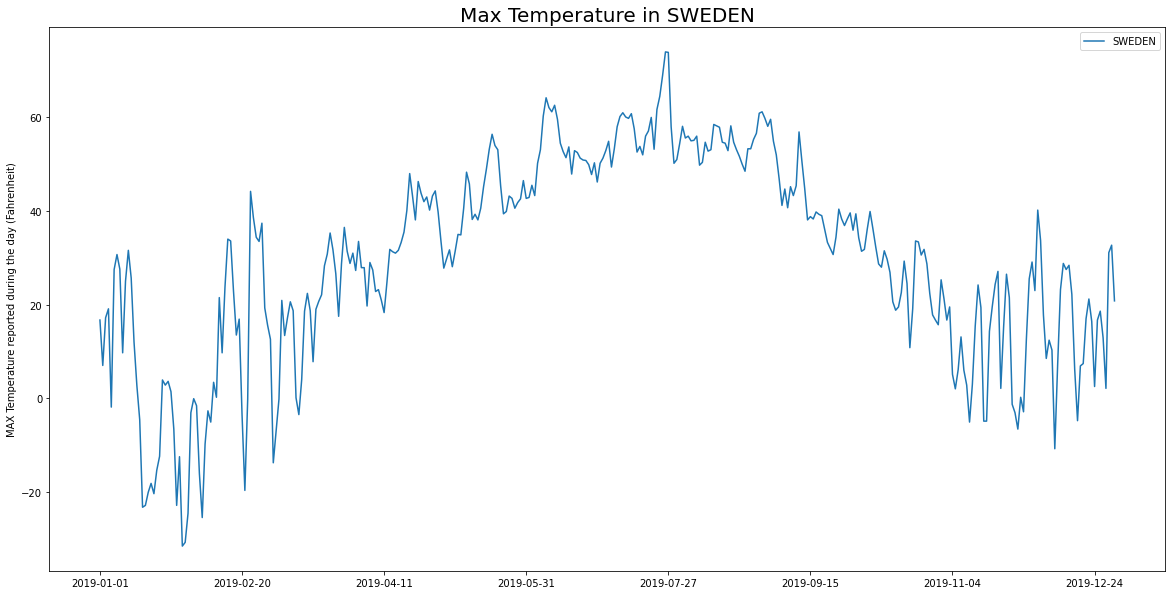

In [234]:
x = sweden_file0_stn_21190['YEARMODA'].apply(float_to_datetime)
y=sweden_file0_stn_21190['TEMP'].astype(float)

plt.figure(figsize=(20,10))
plt.plot(x,y, label=country_name)
plt.xticks(list(x)[0::50])
plt.ylabel("MAX Temperature reported during the day (Fahrenheit)")
plt.title("Max Temperature in {}".format(country_name), fontsize=20)
plt.legend()

In [235]:
sweden_all_files = sweden_all_files.dropna(subset=['YEARMODA']).copy(deep=True)
sweden_all_files = sweden_all_files.dropna(subset=['MAX']).copy(deep=True)
sweden_all_files['YEARMODA'] = (sweden_all_files['YEARMODA'].astype(int)).astype(str)
sweden_all_files['YEARMODA']=  sweden_all_files['YEARMODA'].apply(float_to_datetime)
sweden_all_files

,STN_NO,COUNTRY_ABBR,COUNTRY_FULL,Unnamed: 2,Unnamed: 3,Unnamed: 4,STN---,WBAN,YEARMODA,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
2,21190,SW,SWEDEN,NaN,NaN,NaN,21190.0,99999.0,2019-01-01,16.7,9.2,998.0,959.0,19.8,4.1,10.9,26.4,25.9,0.9*,0.17G,999.9,1000.0
3,21190,SW,SWEDEN,NaN,NaN,NaN,21190.0,99999.0,2019-01-02,7.0,-1.1,1022.5,982.1,30.5,3.1,5.6,14.4,22.6,-4.2*,0.05G,999.9,0.0
4,21190,SW,SWEDEN,NaN,NaN,NaN,21190.0,99999.0,2019-01-03,17.2,8.4,1015.9,976.3,29.7,3.5,14.0,34.4,40.1*,-4.7,0.00G,999.9,11000.0
5,21190,SW,SWEDEN,NaN,NaN,NaN,21190.0,99999.0,2019-01-04,19.1,10.2,1012.3,972.9,26.6,3.2,11.7,27.4,41.0,-0.6*,0.01G,999.9,0.0
6,21190,SW,SWEDEN,NaN,NaN,NaN,21190.0,99999.0,2019-01-05,-1.9,-9.9,1020.7,980.0,31.1,1.3,2.7,999.9,7.7,-7.2,0.00G,999.9,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69578,21740,SW,SWEDEN,NaN,NaN,NaN,21740.0,99999.0,2019-12-27,8.5,-0.1,1035.2,1011.0,31.1,999.9,999.9,999.9,22.1,-6.0*,0.00G,999.9,0.0
69579,21740,SW,SWEDEN,NaN,NaN,NaN,21740.0,99999.0,2019-12-28,12.0,5.2,1026.6,1002.6,27.8,2.4,3.9,999.9,22.3*,-6.3,0.00G,999.9,1000.0
69580,21740,SW,SWEDEN,NaN,NaN,NaN,21740.0,99999.0,2019-12-29,30.8,26.5,999.1,976.3,28.4,3.1,5.8,999.9,35.2*,13.5,0.07G,999.9,11000.0
69581,21740,SW,SWEDEN,NaN,NaN,NaN,21740.0,99999.0,2019-12-30,32.0,25.2,983.4,961.0,29.9,4.0,5.8,999.9,37.0,24.6*,0.23G,999.9,0.0


In [236]:
def remove_stars(x):
  return x.replace("*", "")

In [237]:
sweden_all_files['MAX'] = sweden_all_files['MAX'].astype(str)
sweden_all_files['MAX'] = sweden_all_files['MAX'].apply(remove_stars)
sweden_all_files['MAX'] = sweden_all_files['MAX'].astype(float)

In [242]:
sweden_all_files = sweden_all_files[sweden_all_files['MAX']<200].copy(deep=True)

In [243]:
sweden_all_stns = sweden_all_files.groupby(['YEARMODA'])['MAX'].mean()

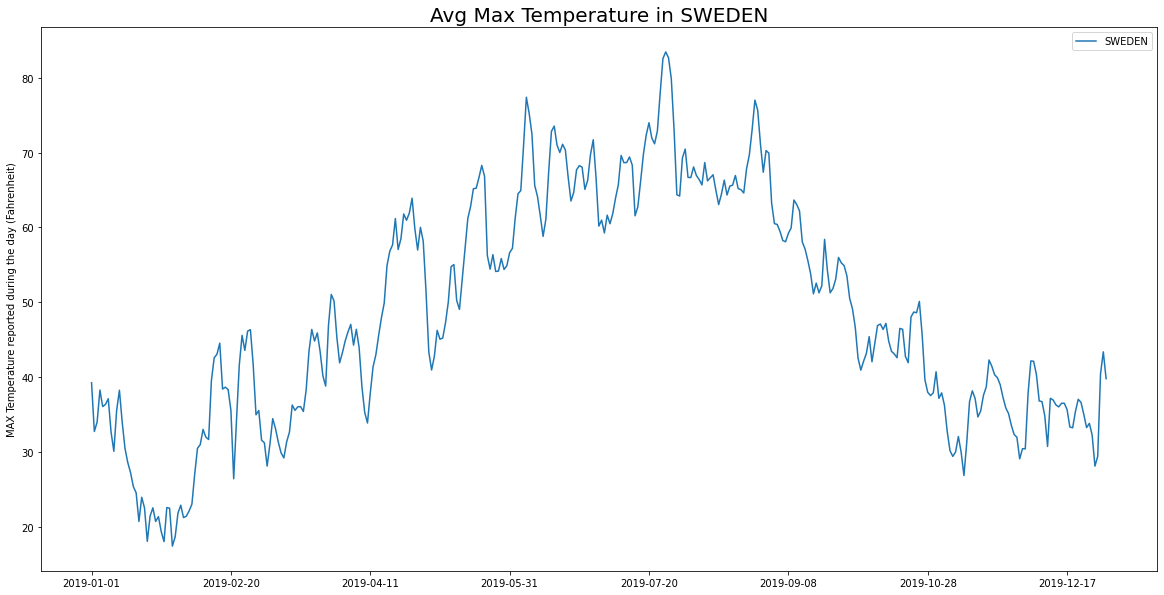

In [246]:
x = sweden_all_stns.index
y=sweden_all_stns.values

plt.figure(figsize=(20,10))
plt.plot(x,y, label=country_name)
plt.xticks(list(x)[0::50])
plt.ylabel("MAX Temperature reported during the day (Fahrenheit)")
plt.title("Avg Max Temperature in {}".format(country_name), fontsize=20)
plt.legend()

### Generalizing the methodology to do it for all the countries

,STN_NO,COUNTRY_ABBR,COUNTRY_FULL,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,012240,NO,NORWAY,NaN,NaN,NaN
1,020690,SW,SWEDEN,NaN,NaN,NaN
2,020870,SW,SWEDEN,NaN,NaN,NaN
3,021190,SW,SWEDEN,NaN,NaN,NaN
4,032690,UK,UNITED KINGDOM,NaN,NaN,NaN
...,...,...,...,...,...,...
25301,968050,ID,INDONESIA,NaN,NaN,NaN
25302,990179,US,UNITED STATES,NaN,NaN,NaN
25303,996770,UK,UNITED KINGDOM,NaN,NaN,NaN
25304,997173,US,UNITED STATES,NaN,NaN,NaN


In [250]:
all_files

,STN---,WBAN,YEARMODA,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
0,10260,99999,20190101,26.1,21.2,1001.9,987.5,20.6,9.0,15.9,29.7,29.8,21.7*,0.02G,18.5,1000
1,10260,99999,20190102,24.9,22.1,1020.1,1005.5,5.4,5.6,13.6,22.1,27.1*,20.7,0.48G,22.8,1000
2,10260,99999,20190103,31.7,29.1,1008.9,994.7,13.6,11.6,21.4,49.5,37.4*,26.8*,0.25G,999.9,11000
3,10260,99999,20190104,32.9,30.3,1011.4,997.1,15.8,4.9,7.8,10.9,36.1,31.8,0.52G,999.9,1000
4,10260,99999,20190105,35.5,33.0,1015.7,1001.4,12.0,10.4,13.6,21.0,38.5*,32.7,0.02G,23.6,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596217,643280,99999,20191111,77.9,63.9,9999.9,9999.9,6.2,2.5,6.0,999.9,80.6*,71.6*,0.00I,999.9,0
596218,649300,99999,20190128,81.9,71.3,9999.9,9999.9,3.3,999.9,999.9,999.9,86.0*,76.6*,0.00I,999.9,0
596219,388400,99999,20191227,34.2,19.9,9999.9,9999.9,999.9,1.9,1.9,999.9,41.7,29.5*,0.00I,999.9,0
596220,618020,99999,20190130,80.0,9999.9,9999.9,9999.9,9.0,0.5,1.9,999.9,96.8,62.1*,0.00I,999.9,0


In [257]:
merged_df['STN_NO'] = merged_df['STN_NO'].astype(str)
all_files['STN---']= all_files['STN---'].astype(str)
big_df = pd.merge(merged_df, all_files, how='left', left_on='STN_NO', right_on='STN---') 

In [260]:
big_df = big_df.dropna(subset=['YEARMODA']).copy(deep=True)
big_df = big_df.dropna(subset=['MAX']).copy(deep=True)
big_df['YEARMODA'] = (big_df['YEARMODA'].astype(int)).astype(str)
big_df['YEARMODA']=  big_df['YEARMODA'].apply(float_to_datetime)


,STN_NO,COUNTRY_ABBR,COUNTRY_FULL,Unnamed: 2,Unnamed: 3,Unnamed: 4,STN---,WBAN,YEARMODA,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
17,129700,HU,HUNGARY,NaN,NaN,NaN,129700,99999.0,2019-01-01,33.6,29.4,9999.9,9999.9,4.8,6.7,12.0,17.1,39.7,24.4,0.02G,999.9,10000.0
18,129700,HU,HUNGARY,NaN,NaN,NaN,129700,99999.0,2019-01-02,37.3,28.3,9999.9,9999.9,6.2,14.8,25.3,35.0,43.2,32.0*,0.02G,999.9,10000.0
19,129700,HU,HUNGARY,NaN,NaN,NaN,129700,99999.0,2019-01-03,28.8,17.9,9999.9,9999.9,8.9,10.7,17.1,27.0,36.5,17.6*,0.00G,999.9,0.0
20,129700,HU,HUNGARY,NaN,NaN,NaN,129700,99999.0,2019-01-04,24.2,16.9,9999.9,9999.9,5.8,3.9,8.0,999.9,32.0*,16.3,99.99,999.9,1000.0
21,129700,HU,HUNGARY,NaN,NaN,NaN,129700,99999.0,2019-01-05,29.2,27.6,9999.9,9999.9,2.9,7.1,9.9,999.9,34.0*,19.9,0.00G,1.6,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616558,997173,US,UNITED STATES,NaN,NaN,NaN,997173,99999.0,2019-12-27,77.9,9999.9,1014.1,9999.9,999.9,3.4,8.9,999.9,81.3*,73.4*,0.00I,999.9,0.0
3616559,997173,US,UNITED STATES,NaN,NaN,NaN,997173,99999.0,2019-12-28,78.5,9999.9,1016.0,9999.9,999.9,3.7,8.9,999.9,81.7*,76.3*,0.00I,999.9,0.0
3616560,997173,US,UNITED STATES,NaN,NaN,NaN,997173,99999.0,2019-12-29,76.8,9999.9,1017.4,9999.9,999.9,2.8,6.0,999.9,80.1*,72.9*,0.00I,999.9,0.0
3616561,997173,US,UNITED STATES,NaN,NaN,NaN,997173,99999.0,2019-12-30,78.3,9999.9,1017.8,9999.9,999.9,4.6,11.1,999.9,80.2*,74.3*,0.00I,999.9,0.0


In [263]:
big_df['MAX'] = big_df['MAX'].astype(str)
big_df['MAX'] = big_df['MAX'].apply(remove_stars)
big_df['MAX'] = big_df['MAX'].astype(float)


In [301]:
big_df = big_df[big_df['MAX']<200].copy(deep=True)

mean_temperature_by_country = big_df.groupby(['COUNTRY_FULL'])['MAX'].mean()

In [302]:
mean_temperature_by_country

COUNTRY_FULL
AFGHANISTAN       75.846905
ALBANIA           71.769606
ALGERIA           80.280633
AMERICAN SAMOA    85.987380
ANGOLA            83.470727
                    ...    
WESTERN SAHARA    77.195472
WESTERN SAMOA     86.803440
ZAIRE             84.773677
ZAMBIA            84.057275
ZIMBABWE          82.043680
Name: MAX, Length: 213, dtype: float64

Text(0.5, 1.0, 'Avg 2019 Temperature per country')

<Figure size 1440x720 with 0 Axes>

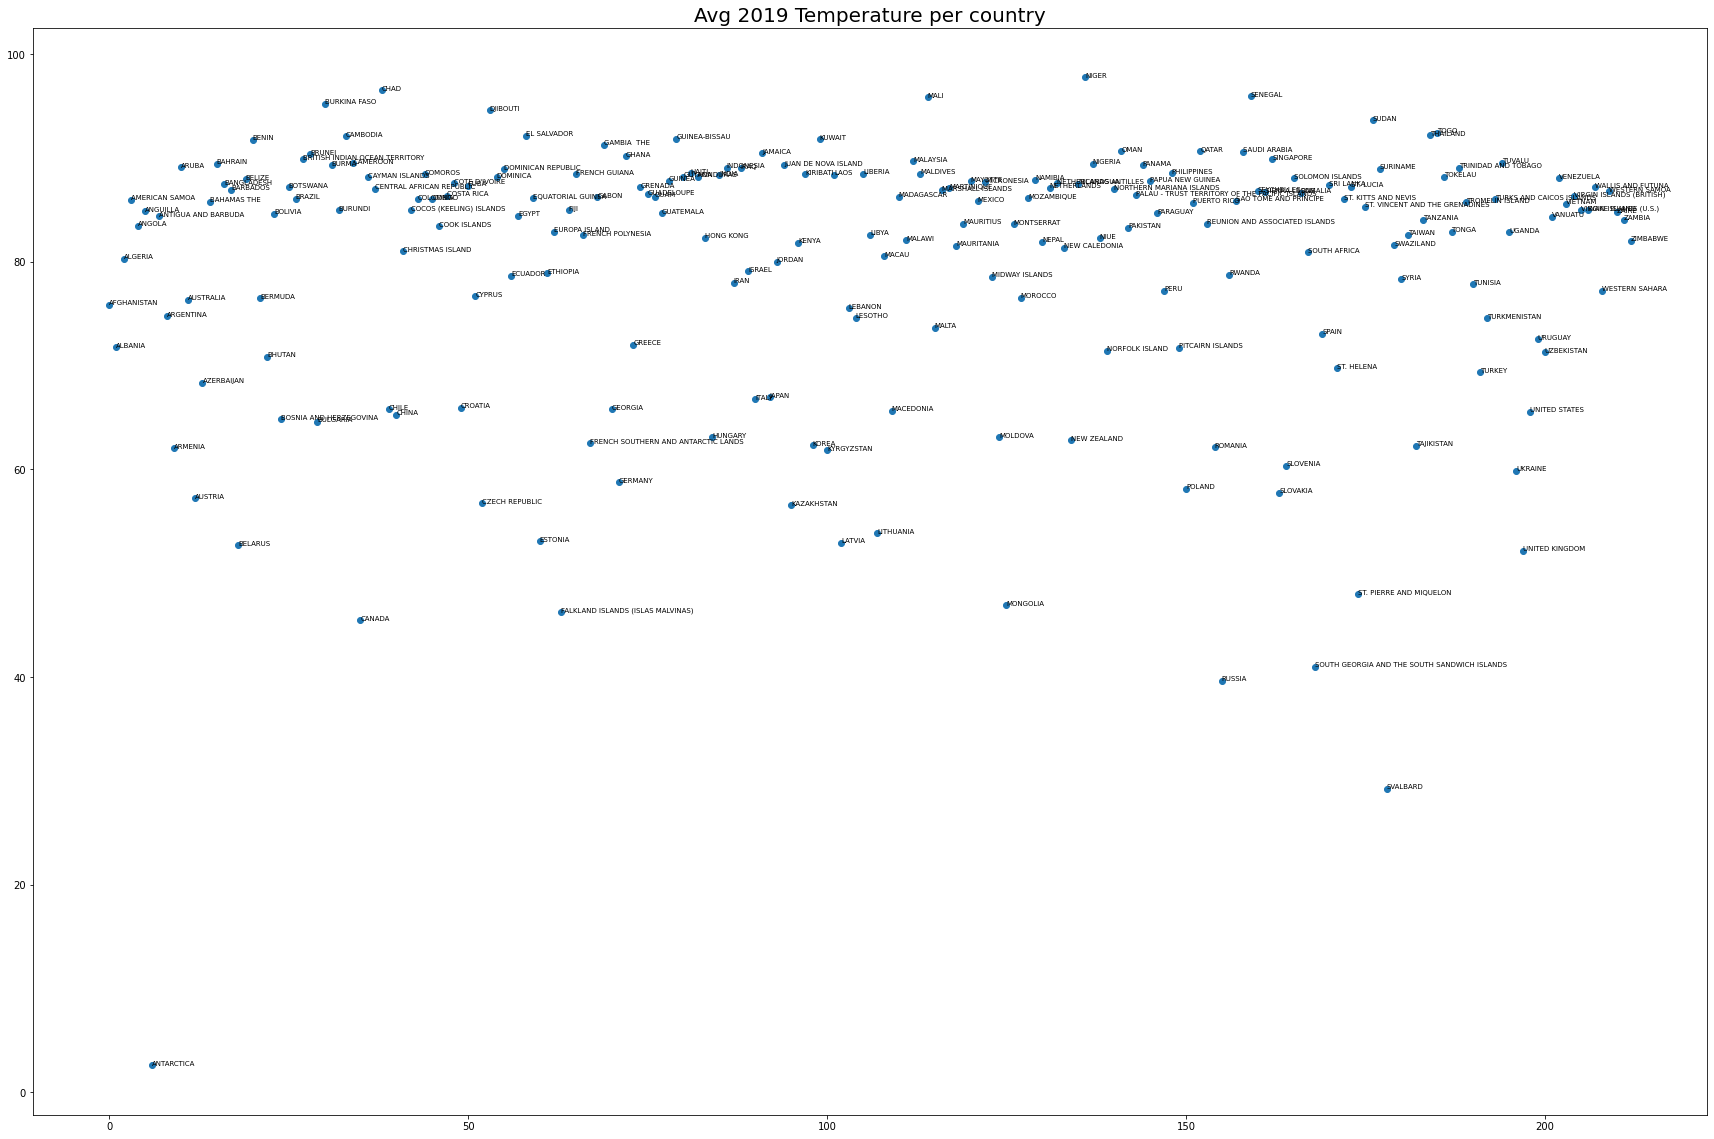

In [303]:
n=mean_temperature_by_country.index
y=mean_temperature_by_country.values
x = np.arange(0, len(y))
plt.figure(figsize=(20,10))
# plt.plot(x,y, label=country_name)
# plt.ylabel("MAX Temperature reported during the day (Fahrenheit)")
# plt.title("Max Temperature in {}".format(country_name), fontsize=20)
# plt.legend()

# plt.scatter(x,y)
fig, ax = plt.subplots(figsize=(30,20))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]), fontsize=7)

ax.set_title("Avg 2019 Temperature per country", fontsize=20)


### Hottest mean temperature over the year is **Niger**

In [304]:
mean_temperature_by_country_df = mean_temperature_by_country.to_frame()

In [306]:
mean_temperature_by_country_df[mean_temperature_by_country_df['MAX']==max(mean_temperature_by_country_df['MAX'])]

,MAX
COUNTRY_FULL,
NIGER,97.794738


In [339]:
### Tornado is the sixth digit
big_df['FRSHTT string'] = (big_df['FRSHTT'].astype(int)).astype(str)

In [347]:
big_df['Tornado'] = big_df['FRSHTT string'].apply(lambda x: 1 if x[-1]=='1' else 0)

In [349]:
big_df['FRSHTT string'].unique()

array(['10000', '0', '1000', '11000', '110000', '101000', '100000',
       '111000', '10010', '110010', '10', '10110', '10100', '11100',
       '11010', '110100', '100010', '11110', '111010', '111100', '1010',
       '10011', '10001', '110110', '1', '110001', '11111', '11011',
       '10111', '101010', '111110', '11', '100001', '110011', '11001',
       '1001', '101001'], dtype=object)

In [350]:
big_df['Tornado'].unique()

array([0, 1])

In [351]:
big_df[big_df['Tornado']==1]

,STN_NO,COUNTRY_ABBR,COUNTRY_FULL,Unnamed: 2,Unnamed: 3,Unnamed: 4,STN---,WBAN,YEARMODA,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,FRSHTT string,Tornado
25047,654720,GH,GHANA,NaN,NaN,NaN,654720,99999.0,2019-09-06,79.0,73.9,1013.4,9999.9,6.5,10.3,17.1,999.9,86.2,75.2*,0.00E,999.9,10011.0,10011,1
45333,718432,CA,CANADA,NaN,NaN,NaN,718432,99999.0,2019-05-15,32.0,28.2,1007.0,9999.9,7.4,13.2,15.0,15.9,33.8,30.2*,99.99,999.9,10001.0,10001,1
45413,718432,CA,CANADA,NaN,NaN,NaN,718432,99999.0,2019-08-30,48.7,47.5,989.9,9999.9,1.9,15.8,18.1,25.1,50.0,46.4*,99.99,999.9,10001.0,10001,1
64285,651230,NI,NIGERIA,NaN,NaN,NaN,651230,99999.0,2019-05-01,88.9,72.5,1005.9,1004.3,7.0,8.7,14.0,999.9,98.1,76.1*,99.99,999.9,10011.0,10011,1
82117,173200,TU,TURKEY,NaN,NaN,NaN,173200,99999.0,2019-04-18,64.5,50.1,1014.3,1013.8,12.4,6.0,11.1,999.9,68.5,52.9,0.00F,999.9,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534836,162150,IT,ITALY,NaN,NaN,NaN,162150,99999.0,2019-11-09,56.6,47.9,9999.9,9999.9,5.8,6.3,15.9,999.9,62.6,51.8*,99.99,999.9,10001.0,10001,1
3534841,162150,IT,ITALY,NaN,NaN,NaN,162150,99999.0,2019-11-14,58.9,52.5,9999.9,9999.9,6.2,7.9,21.0,31.1,64.4,55.4*,0.00I,999.9,1.0,1,1
3534845,162150,IT,ITALY,NaN,NaN,NaN,162150,99999.0,2019-11-18,60.9,50.1,9999.9,9999.9,5.9,14.5,24.1,35.0,64.4,55.4*,99.99,999.9,10111.0,10111,1
3600070,162390,IT,ITALY,NaN,NaN,NaN,162390,99999.0,2019-09-01,74.2,64.0,9999.9,9999.9,6.1,4.0,17.1,28.9,86.9,68.0*,99.99,999.9,10011.0,10011,1


### 3. Which country had the second highest average mean wind speed over the year?

ARUBA

In [355]:
wind_df = pd.merge(merged_df, all_files, how='left', left_on='STN_NO', right_on='STN---') 

In [360]:
wind_df = wind_df.dropna(subset=['YEARMODA']).copy(deep=True)
wind_df = wind_df.dropna(subset=['WDSP']).copy(deep=True)


In [361]:
wind_df = wind_df[wind_df['WDSP']<200].copy(deep=True)


In [365]:
wind_result = wind_df.groupby(['COUNTRY_FULL'])['WDSP'].mean()

In [366]:
wind_result_df = wind_result.to_frame()

In [369]:
wind_result_df.sort_values(by=['WDSP'], ascending=False)

,WDSP
COUNTRY_FULL,
FALKLAND ISLANDS (ISLAS MALVINAS),17.877833
ARUBA,15.975683
FRENCH SOUTHERN AND ANTARCTIC LANDS,14.203722
BARBADOS,14.097541
ST. PIERRE AND MIQUELON,13.907671
...,...
NEPAL,2.619947
THAILAND,2.613961
RWANDA,2.278963
